<a href="https://colab.research.google.com/github/MatthieuMichaux/MatthieuMichaux.github.io/blob/main/hw8datajoiningandregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 8, data joining

In [3]:
!pip install yfinance 
# This cell below would install the yfinance python package, using the pip package manager tool
#only is inastalled for 8hrs

In [6]:
import yfinance as yf
#yfinance is imported in this notebook

In [10]:
#download the data for the stock you wish to analyse
#here FTSE (FTSE100), DJI (DowJones), N225 (Nikkei225), FCHI (CAC40) over the last 10 years
FTSE100 = yf.Ticker("^FTSE").history(period='10y')
DowJones = yf.Ticker("^DJI").history(period='10y')
Nikkei225 = yf.Ticker("^N225").history(period='10y')
CAC40 = yf.Ticker("^FCHI").history(period='10y')
#NOT EFFICIENT CAN DO IT A MORE EFFICIENT WAY SEE BELOW

In [11]:
FTSE100

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-11-30,5337.000000,5539.000000,5275.000000,5505.399902,1647245500,0,0
2011-12-01,5505.399902,5553.899902,5486.899902,5489.299805,939174800,0,0
2011-12-02,5489.299805,5595.500000,5489.100098,5552.299805,984099700,0,0
2011-12-05,5552.299805,5602.799805,5545.899902,5568.000000,900658000,0,0
2011-12-06,5568.000000,5593.000000,5521.899902,5568.700195,857312600,0,0
...,...,...,...,...,...,...,...
2021-11-24,7266.700195,7307.899902,7246.000000,7286.299805,661514300,0,0
2021-11-25,7286.299805,7311.899902,7286.299805,7310.399902,487924100,0,0
2021-11-26,7310.399902,7310.399902,7042.100098,7044.000000,1714871800,0,0


In [12]:
#MORE EFFICIENT WAY:
dfs=[] #creates empty list of dataframes
for x in ['^FTSE','^DJI','^N225','^FCHI']: #[] means it is a list, df is dataframe
   df = yf.Ticker(x).history(period='10y')
   df=df[['Close']]
   df['Name']=x
   dfs.append(df) #append newly download and formatted dataframe to our list of d
#ist of DataFrames, each containing the closing stock price and the stock name, for the past 10 years.

In [14]:
dfs[0].head(3) #dfs[0] is FTSE, dfs[1] is DowJones then Nikkei and CAC40
#head 3 is first three data points

,Close,Name
Date,,
2011-11-30,5505.399902,^FTSE
2011-12-01,5489.299805,^FTSE
2011-12-02,5552.299805,^FTSE


In [16]:
import pandas as pd
pd.concat([ dfs[0],dfs[1] ]) #list because () of dataframes, if don't put [0],[1] but just dfs all dataframes will appear
#concatenation= the action of linking things together in a series, or the condition of being linked in such a way, columns have to be exactly the same though

,Close,Name
Date,,
2011-11-30,5505.399902,^FTSE
2011-12-01,5489.299805,^FTSE
2011-12-02,5552.299805,^FTSE
2011-12-05,5568.000000,^FTSE
2011-12-06,5568.700195,^FTSE
...,...,...
2021-11-22,35619.250000,^DJI
2021-11-23,35813.800781,^DJI
2021-11-24,35804.378906,^DJI


In [21]:
#EFFICIENT MAXIMUM:
dfz=pd.DataFrame() #initialise empty DataFrame
for x in dfs:
  stock_name=x['Name'].values[0] #stock_name=x['Name'] creates an array with the stock names, values[0] will be the first value of the name so "NVDA"
  stock_name=stock_name.replace('^','')
  stock_name=stock_name.replace('FCHI','CAC40')
  stock_name=stock_name.replace('N225','Nikkei 225')
  stock_name=stock_name.replace('DJI','Dow Jones')
  stock_name=stock_name.replace('FTSE','FTSE 100')
  x=x[['Close']]
  x.columns=[stock_name]
  dfz=x.join(dfz)

In [22]:
dfz.head()

,CAC40,Nikkei 225,Dow Jones,FTSE 100
Date,,,,
2011-11-30,3154.620117,8434.610352,12045.679688,5505.399902
2011-12-01,3129.949951,8597.379883,12020.030273,5489.299805
2011-12-02,3164.949951,8643.750000,12019.419922,5552.299805
2011-12-05,3201.280029,8695.980469,12097.830078,5568.000000
2011-12-06,3179.629883,8575.160156,12150.129883,5568.700195


In [23]:
dfz.to_csv('my_indexes.csv')

In [24]:
import json

In [25]:
json_list_of_dicts=list(df.T.to_dict().values())
open('my_indexes.json','w').write(json.dumps(json_list_of_dicts))

114908

Regression using seaborn

In [30]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [31]:
#load the index data to the working folder
indexes=pd.read_csv('my_indexes.csv')
indexes.head(2)

,Date,CAC40,Nikkei 225,Dow Jones,FTSE 100
0,2011-11-30,3154.620117,8434.610352,12045.679688,5505.399902
1,2011-12-01,3129.949951,8597.379883,12020.030273,5489.299805


In [32]:
x = indexes['Date'].values
x = pd.to_datetime(x) #let's make this a proper date
y1 = indexes[indexes.columns[1]]
y2 = indexes[indexes.columns[2]]
y3 = indexes[indexes.columns[3]]
y4 = indexes[indexes.columns[4]]

In [33]:
import seaborn as sns
sns.set()

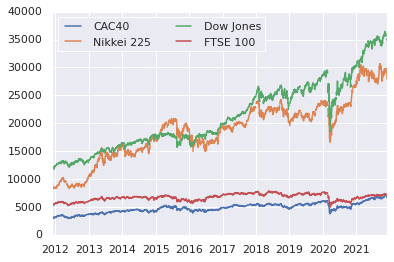

In [34]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.legend(stocks.columns[1:], ncol=2, loc='upper left');

In [35]:
#The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.
#Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

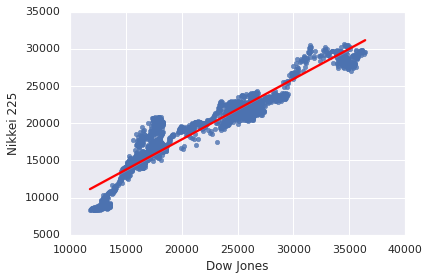

In [67]:
sns.regplot(x='Dow Jones',y='Nikkei 225',data=indexes,line_kws={'color':'red'})

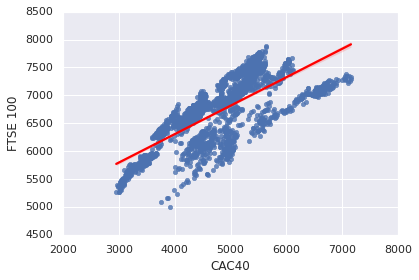

In [66]:
sns.regplot(x='CAC40',y='FTSE 100',data=indexes, line_kws={'color':'red'})

In [43]:
from scipy.stats import linregress

In [50]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=indexes.dropna()['Dow Jones'], y=indexes.dropna()['Nikkei 225'])

In [51]:
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  0.81  * x +  1598.7
R² =  0.89


In [68]:
rvalue

0.94387453039038

In [ ]:
figfile=